In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

df.head(n=6)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24


In [ ]:
df.shape

(10127, 16)

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [ ]:
def starts_dados_faltantes(df: pd.DataFrame) -> None:

  starts_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100 * qtd/total, 2)}}
      starts_dados_faltantes.append(dict_dados_faltantes)

  for start in starts_dados_faltantes:
    print(start)

In [ ]:
starts_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [ ]:
starts_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
starts_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
fn = lambda valor: float(valor.replace('.', '').replace(',', '.'))

df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [ ]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
default,10127.0,1.606596e-01,3.672348e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
idade,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
dependentes,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
limite_credito,10127.0,8.632440e+03,9.088788e+03,1.438000e+03,2.555355e+03,4.549420e+03,1.106817e+04,3.451699e+04
valor_transacoes_12m,10127.0,4.404583e+03,3.397128e+03,5.101600e+02,2.155825e+03,3.899590e+03,4.741310e+03,1.848493e+04


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7081, 16)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

In [ ]:
df.select_dtypes('object').head(n=6)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue
8,M,sem educacao formal,solteiro,$60K - $80K,blue


<ipython-input-42-5dc09afbf1a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)
<ipython-input-42-5dc09afbf1a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)
<ipython-input-42-5dc09afbf1a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)


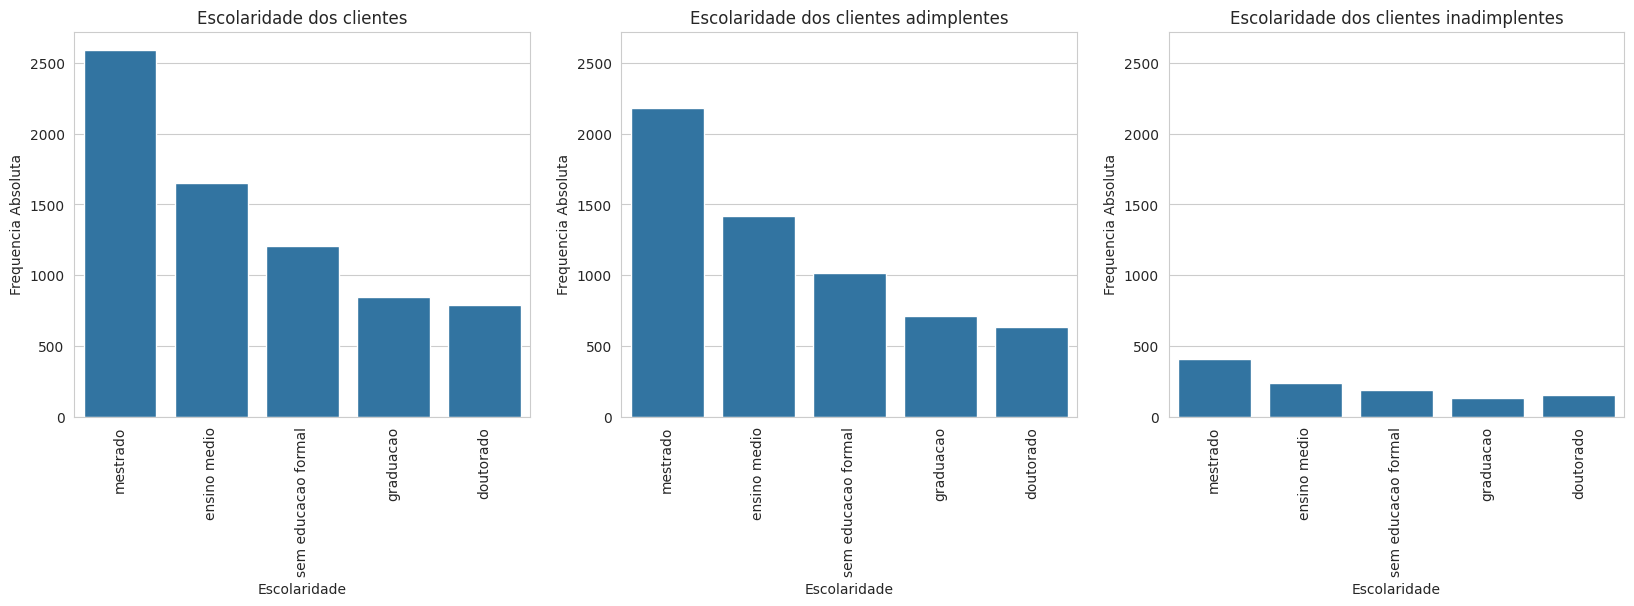

In [ ]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos clientes', 'Escolaridade dos clientes adimplentes', 'Escolaridade dos clientes inadimplentes']


def grafico_barras(col, title):
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[col]['freq'] * 1.1
  figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[col].value_counts().to_frame()
    df_to_plot.rename(columns={col: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[col] = df_to_plot.index
    df_to_plot.reset_index(drop=True, inplace=True)
    df_to_plot.sort_values(by=[col])

    f = sns.barplot(x=df_to_plot[col], y=df_to_plot['count'], ax=eixos[eixo])
    f.set(title=title[eixo], xlabel = col.capitalize(), ylabel = 'Frequencia Absoluta')
    f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo +=1

  figura.show()

grafico_barras(coluna, titulos)

<ipython-input-42-5dc09afbf1a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)
<ipython-input-42-5dc09afbf1a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)
<ipython-input-42-5dc09afbf1a4>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels = f.get_xticklabels(), rotation = 90)


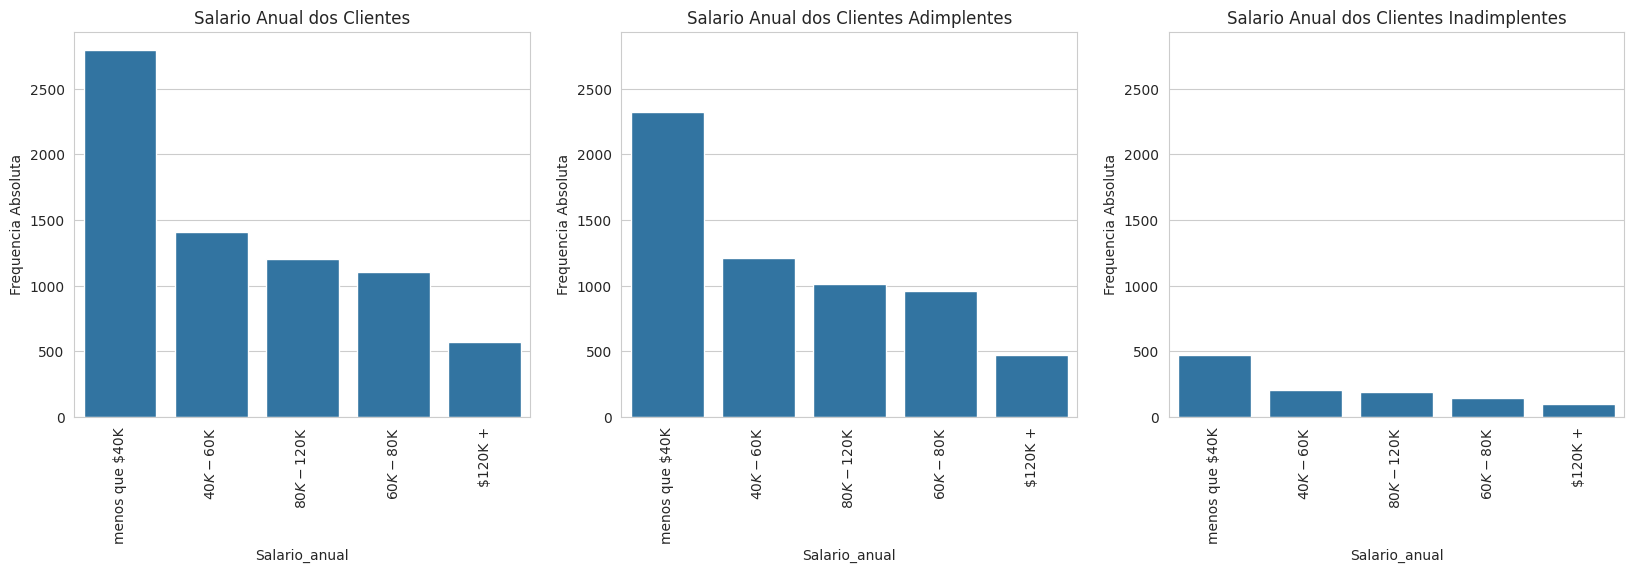

In [ ]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes', 'Salario Anual dos Clientes Adimplentes', 'Salario Anual dos Clientes Inadimplentes']

grafico_barras(coluna, titulos)

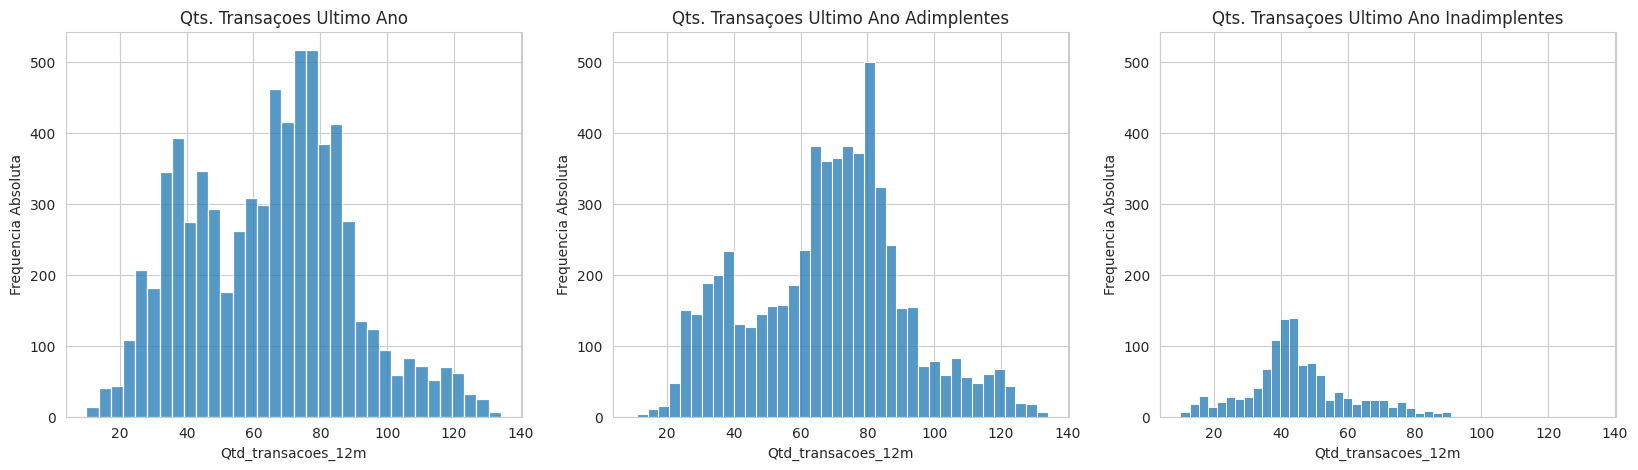

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qts. Transaçoes Ultimo Ano', 'Qts. Transaçoes Ultimo Ano Adimplentes', 'Qts. Transaçoes Ultimo Ano Inadimplentes']

def grafico_barras_num(col, title):

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x = col, data = dataframe, stat = 'count', ax = eixos[eixo])
    f.set(title = title[eixo], xlabel = col.capitalize(), ylabel = 'Frequencia Absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim = (0, max_y))
    eixo +=1

  figura.show()

grafico_barras_num(coluna, titulos)

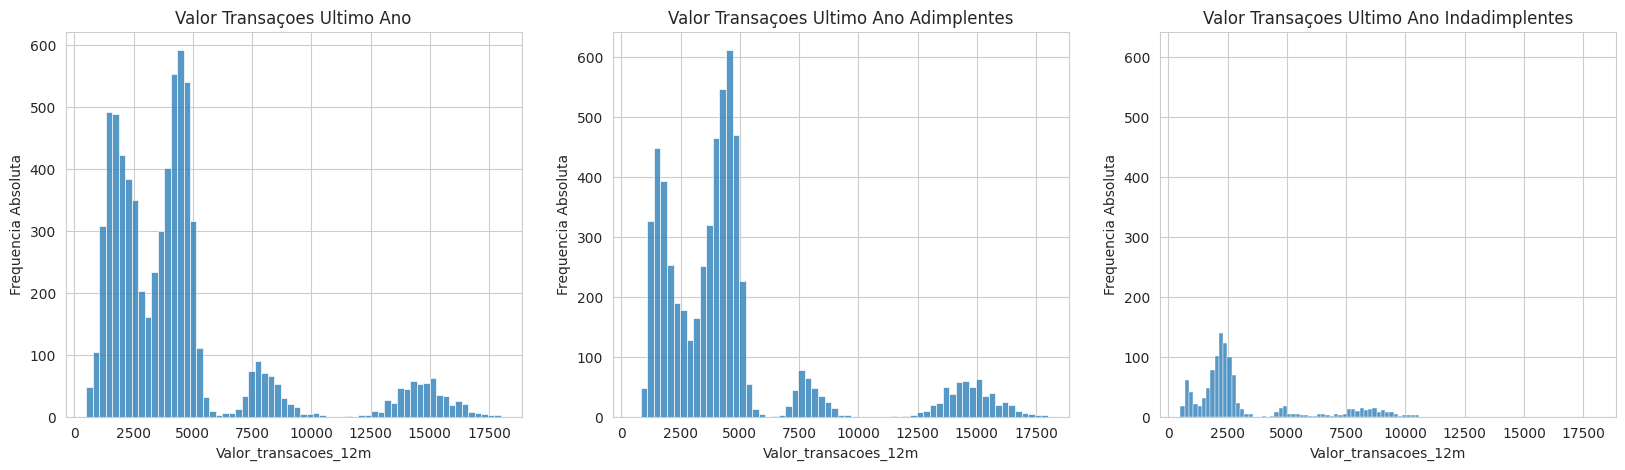

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor Transaçoes Ultimo Ano', 'Valor Transaçoes Ultimo Ano Adimplentes', 'Valor Transaçoes Ultimo Ano Indadimplentes']

grafico_barras_num(coluna, titulos)

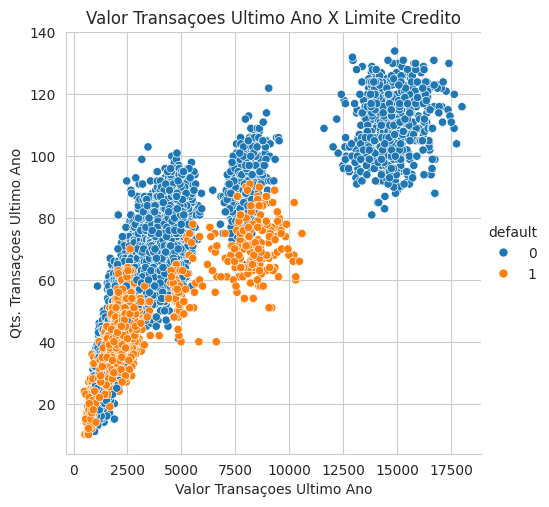

In [ ]:
f = sns.relplot(x = 'valor_transacoes_12m', y = 'qtd_transacoes_12m', data = df, hue = 'default')
f.set(
    title = 'Valor Transaçoes Ultimo Ano X Limite Credito',
    xlabel = 'Valor Transaçoes Ultimo Ano',
    ylabel = 'Qts. Transaçoes Ultimo Ano')